# Analysis of Synthetically Generated Data
Validating that the sampling produces data of the correct characteristics

In [1]:
import init
from common import constants as cn
from common.data_provider import DataProvider
from common import transform_data
from common_python.statistics import empirical_distribution_generator, density, multiple_density
from common_python.plots import util_plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Common Codes

In [ ]:
def analyze(is_decorrelate):
    df_data = transform_data.aggregateGenes()
    df_data = df_data.T
    columns_data = df_data.columns
    df_data.columns = range(len(columns_data))
    empirical = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
    df_gen = empirical.sample(1000, is_decorrelate=False)
    # Plot the marginals
    density_data = multiple_density.MultipleDensity(df_data, [-1, 0, 1])
    density_gen = multiple_density.MultipleDensity(df_gen, [-1, 0, 1])
    density_data.plotMarginalComparisons(density_gen, xlabel="Original", ylabel="Generated")
    # Plot the correlations
    df_corr_data = df_data.cor()
    util_plots.plotCategoricalHeatmap(df_corr_data, title="Original")
    df_corr_data = df_data.cor()
    util_plots.plotCategoricalHeatmap(df_corr_data, title="Original")
    

## Reproduce the original distribution

In [5]:
df_data = transform_data.aggregateGenes()
df_data = df_data.T
columns_data = df_data.columns
df_data.columns = range(len(columns_data))
empirical = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
df_gen = empirical.sample(1000, is_decorrelate=False)


In [6]:
print("nrows: %d, ncols: %d" % (len(df_gen), len(df_gen.columns)))

nrows: 1000, ncols: 1515


In [7]:
density_gen = multiple_density.MultipleDensity(df_gen, [-1, 0, 1])

In [8]:
density_gen.df.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
-1,0.919,0.887,0.935,0.845,0.702,0.773,0.572,0.393,0.636,0.604,...,0.041,0.000,0.041,0.041,0.000,0.000,0.00,0.000,0.089,0.000
0,0.081,0.113,0.065,0.155,0.298,0.227,0.428,0.607,0.364,0.276,...,0.515,0.524,0.309,0.233,0.434,0.234,0.19,0.398,0.064,0.153
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.120,...,0.444,0.476,0.650,0.726,0.566,0.766,0.81,0.602,0.847,0.847


In [9]:
density_raw = multiple_density.MultipleDensity(df_data, [-1, 0, 1])
density_raw.df.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
-1,0.923077,0.884615,0.923077,0.846154,0.692308,0.769231,0.576923,0.384615,0.653846,0.615385,...,0.038462,0.0,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000
0,0.076923,0.115385,0.076923,0.153846,0.307692,0.230769,0.423077,0.615385,0.346154,0.269231,...,0.500000,0.5,0.307692,0.230769,0.423077,0.230769,0.230769,0.384615,0.076923,0.153846
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115385,...,0.461538,0.5,0.653846,0.730769,0.576923,0.769231,0.769231,0.615385,0.846154,0.846154


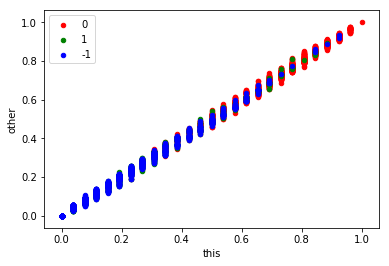

In [10]:
density_raw.plotMarginalComparisons(density_gen)

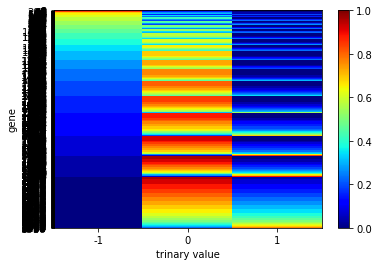

In [11]:
_ = density_raw.plotMarginals(xlabel="trinary value", ylabel="gene")

## Reproduce the original covariance structure

In [12]:
df_corr_raw = df_data.corr()
len(df_corr_raw)

1515

In [13]:
df_corr_raw_adj = df_corr_raw -pd.DataFrame(np.identity(1515))
df_corr_raw_adj.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
0,0.000000,0.347524,0.458333,0.276956,0.120281,0.184466,0.337100,0.228218,0.396746,0.416333,...,-0.215562,-0.288675,-0.317221,-0.371154,-0.337100,-0.527046,-0.184466,-0.365148,-0.636501,-0.677003
1,0.347524,0.000000,0.347524,0.179664,0.280900,0.373649,0.178068,0.038069,0.243315,0.260434,...,-0.482167,-0.361158,-0.611842,-0.464345,-0.421741,-0.373649,-0.373649,-0.456832,-0.482617,-0.513327
2,0.458333,0.347524,0.000000,0.677003,0.433013,0.184466,0.337100,0.228218,0.396746,0.208167,...,-0.215562,0.000000,-0.059479,-0.103098,-0.044947,-0.184466,-0.527046,-0.365148,-0.135015,-0.276956
3,0.276956,0.179664,0.677003,0.000000,0.639602,0.019462,0.497930,0.337100,0.586033,0.307482,...,-0.318406,-0.213201,0.102499,0.045686,0.149379,-0.019462,-0.272475,-0.320245,-0.014245,-0.113636
4,0.120281,0.280900,0.433013,0.639602,0.000000,-0.167360,0.441149,0.527046,0.565916,0.480740,...,-0.350736,-0.166667,-0.137361,-0.238095,0.064875,-0.228218,-0.030429,-0.329404,-0.311805,-0.408635


In [14]:
xx = [max(np.abs(df_corr_raw_adj[c])) for i, c in enumerate(df_corr_raw_adj.columns)]

In [15]:
len([v for v in xx if v > 0.9])

805

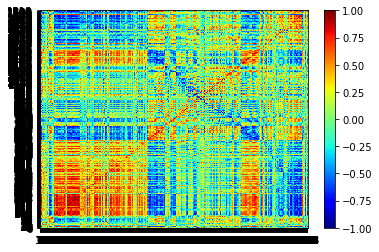

In [16]:
util_plots.plotCategoricalHeatmap(df_corr_raw)

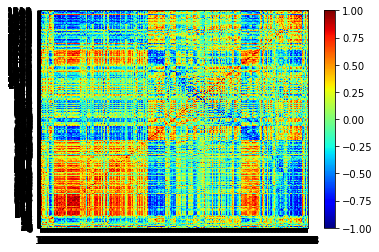

In [17]:
df_corr_gen = df_gen.corr()
util_plots.plotCategoricalHeatmap(df_corr_gen)

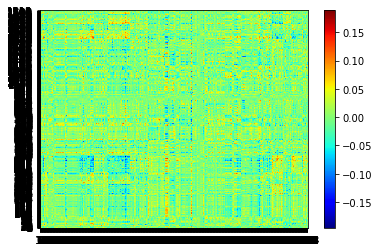

In [21]:
# Differences in correlation structure
util_plots.plotCategoricalHeatmap(df_corr_raw - df_corr_gen)

In [18]:
df_corr_gen.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
0,1.000000,0.276078,0.412349,0.207058,0.071016,0.127861,0.343211,0.238884,0.392430,0.456722,...,-0.210651,-0.282958,-0.319556,-0.372676,-0.339038,-0.537145,-0.164528,-0.365125,-0.666950,-0.698523
1,0.276078,1.000000,0.328707,0.135150,0.278489,0.349492,0.163655,0.034980,0.215771,0.255880,...,-0.481265,-0.340185,-0.613074,-0.459624,-0.407606,-0.354814,-0.406845,-0.438969,-0.460527,-0.497598
2,0.412349,0.328707,1.000000,0.615621,0.404680,0.176676,0.304808,0.212155,0.348521,0.182352,...,-0.187081,0.008609,-0.054380,-0.093105,-0.039203,-0.170448,-0.544398,-0.324271,-0.116524,-0.259786
3,0.207058,0.135150,0.615621,1.000000,0.657352,-0.014413,0.495124,0.344619,0.566129,0.296209,...,-0.303890,-0.231156,0.134815,0.080132,0.191059,0.021342,-0.250395,-0.329162,0.020728,-0.071269
4,0.071016,0.278489,0.404680,0.657352,1.000000,-0.180831,0.439475,0.524254,0.538598,0.453734,...,-0.346811,-0.170068,-0.113926,-0.208866,0.107337,-0.182130,-0.046703,-0.350169,-0.268694,-0.360800


## Maintain marginals with random replacement, but eliminate covariances.

In [19]:
size = 1000
df = pd.DataFrame(np.random.randint(1, 5, (size, size)))
df_b = df == 1

In [20]:
df_b.sum()

0      250
1      260
2      266
3      262
4      247
5      242
6      248
7      231
8      241
9      256
10     258
11     246
12     272
13     249
14     248
15     255
16     246
17     255
18     265
19     240
20     244
21     259
22     246
23     257
24     244
25     238
26     265
27     238
28     231
29     258
      ... 
970    236
971    238
972    231
973    233
974    238
975    239
976    253
977    248
978    251
979    231
980    271
981    248
982    276
983    250
984    276
985    255
986    271
987    251
988    269
989    254
990    228
991    235
992    250
993    279
994    235
995    232
996    250
997    267
998    244
999    271
Length: 1000, dtype: int64